# Summary
* Download Landsat 30m
* Download MODIS 250m
* Checking spatial resolution - GDAL
* Checking spatial resolution - Python
* Plot original image
* GDAL reshape Landsat to 15m
* GDAL reshape MODIS to 125m
* Python reshape Landsat to 15m
* Python reshape MODIS to 125m
* Plot reshaped image
* Same size image operation - success
* Operation with different size image - error
* Homework
* Homework solution

# Download Landsat 30m


Landsat 8 satellite images can be downloaded from the USGS website by logging in and filtering by the date chosen with the help of a friendly web interface.

Another way is by using AWS S3, which is an Amazon storage service.

With AWS we can simply assemble the image URL and download it. This requires the ID of each ticket, and this is possible by accessing a csv listing all Landsat 8 tickets.

The catalog download link is:
https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz

With pandas we can read this data.

In [0]:
import pandas as pd
df = pd.read_csv('https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz')

We can also burn to local disk so you don't have to download it every time.

In [0]:
df.to_csv('scene_list.gz', compression='gzip', index=False)

In [0]:
df = pd.read_csv('scene_list.gz', parse_dates=['acquisitionDate'])

In [0]:
df.head(2)

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
0,LC08_L1TP_149039_20170411_20170415_01_T1,LC81490392017101LGN00,2017-04-11 05:36:29.349932,0.00,L1TP,149,39,29.22165,72.41205,31.34742,74.84666,https://s3-us-west-2.amazonaws.com/landsat-pds...
1,LC08_L1TP_012001_20170411_20170415_01_T1,LC80120012017101LGN00,2017-04-11 15:14:40.001201,0.15,L1TP,12,1,79.51504,-22.06995,81.90314,-7.44339,https://s3-us-west-2.amazonaws.com/landsat-pds...


Filtering the catalog to an orbit point of interest.

In [0]:
df[(df.path==229) & (df.row==71) & (df.acquisitionDate.dt.year==2019)]

,productId,entityId,acquisitionDate,cloudCover,processingLevel,path,row,min_lat,min_lon,max_lat,max_lon,download_url
860010,LC08_L1TP_229071_20190111_20190111_01_RT,LC82290712019011LGN00,2019-01-11 14:04:00.946241,82.19,L1TP,229,71,-16.97647,-61.35675,-14.85646,-59.17230,https://s3-us-west-2.amazonaws.com/landsat-pds...
1400091,LC08_L1GT_229071_20190127_20190127_01_RT,LC82290712019027LGN00,2019-01-27 14:03:57.001474,100.00,L1GT,229,71,-16.97640,-61.34839,-14.85640,-59.16387,https://s3-us-west-2.amazonaws.com/landsat-pds...
1423364,LC08_L1TP_229071_20190212_20190212_01_RT,LC82290712019043LGN00,2019-02-12 14:03:54.913998,83.47,L1TP,229,71,-16.97642,-61.35118,-14.85642,-59.16668,https://s3-us-west-2.amazonaws.com/landsat-pds...
1434695,LC08_L1TP_229071_20190212_20190222_01_T1,LC82290712019043LGN00,2019-02-12 14:03:54.913998,83.47,L1TP,229,71,-16.97642,-61.35118,-14.85642,-59.16668,https://s3-us-west-2.amazonaws.com/landsat-pds...
1437077,LC08_L1TP_229071_20190212_20190222_01_T1,LC82290712019043LGN00,2019-02-12 14:03:54.913998,83.47,L1TP,229,71,-16.97642,-61.35118,-14.85642,-59.16668,https://s3-us-west-2.amazonaws.com/landsat-pds...
1441755,LC08_L1GT_229071_20190228_20190228_01_RT,LC82290712019059LGN00,2019-02-28 14:03:51.121251,79.88,L1GT,229,71,-16.97642,-61.35118,-14.85642,-59.16668,https://s3-us-west-2.amazonaws.com/landsat-pds...
1459064,LC08_L1GT_229071_20190316_20190316_01_RT,LC82290712019075LGN00,2019-03-16 14:03:45.469386,89.60,L1GT,229,71,-16.97640,-61.34839,-14.85640,-59.16387,https://s3-us-west-2.amazonaws.com/landsat-pds...
1479418,LC08_L1TP_229071_20190401_20190402_01_RT,LC82290712019091LGN00,2019-04-01 14:03:42.374012,30.36,L1TP,229,71,-16.97380,-61.36233,-14.85650,-59.17798,https://s3-us-west-2.amazonaws.com/landsat-pds...
1494779,LC08_L1TP_229071_20190417_20190417_01_RT,LC82290712019107LGN00,2019-04-17 14:03:36.728758,76.02,L1TP,229,71,-16.97387,-61.37069,-14.85656,-59.18641,https://s3-us-west-2.amazonaws.com/landsat-pds...
1500009,LC08_L1TP_229071_20190401_20190421_01_T1,LC82290712019091LGN00,2019-04-01 14:03:42.374012,30.63,L1TP,229,71,-16.97380,-61.36233,-14.85650,-59.17798,https://s3-us-west-2.amazonaws.com/landsat-pds...


Now knowing the image ID we can download it.

In [0]:
import urllib.request

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190908_20190917_01_T1/LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF')

('LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF',
 <http.client.HTTPMessage at 0x7f5dd8800d68>)

# Download MODIS 250m

MODIS images can be downloaded from the AWS, EarthData, USGS and INPE website.

In the example below the download was made by the [INPE] website (http://www.dgi.inpe.br/catalogo)

# Checking spatial resolution - GDAL

With the gdal library, we can see the spatial resolution of the image by running the command below:

## Landsat


In [0]:
!gdalinfo LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF | grep 'Pixel Size'

Pixel Size = (30.000000000000000,-30.000000000000000)


The output is the measurement in meters of the pixel in x and y, being 30m for both.

Below we can see the amount of pixel in rows and columns:

In [0]:
!!gdalinfo LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF | grep 'Size is'

['Size is 7711, 7821']

## Modis

In [0]:
!gdalinfo AQUA.250M_TrueColor.2019_09_08.17_50_32.tif | grep 'Pixel Size'

Pixel Size = (250.000000000000000,-250.000000000000000)


The output is the measurement in meters of the pixel in x and y, being 250m for both.

Below we can see the amount of pixel in rows and columns:

In [0]:
!gdalinfo AQUA.250M_TrueColor.2019_09_08.17_50_32.tif | grep 'Size is'

Size is 13036, 17039


# Checking spatial resolution - Python

## Landsat

In [0]:
from osgeo import gdal
# Read file
raster = gdal.Open('LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF')
# Get geo metadata
geo =raster.GetGeoTransform()
# get size: X an Y
X = geo[1]
Y = geo[5]

print(X, Y)

30.0 -30.0


## Modis

In [0]:
from osgeo import gdal
# Read file
raster = gdal.Open('AQUA.250M_TrueColor.2019_09_08.17_50_32.tif')
# Get geo metadata
geo =raster.GetGeoTransform()
# get size: X an Y
X = geo[1]
Y = geo[5]

print(X, Y)

250.0 -250.0


# Plot original image

Let's show the image with its original size. For this we will need the raster library. Let's check if it is already installed.

In [0]:
!pip install rasterio

     |████████████████████████████████| 18.0MB 263kB/s 


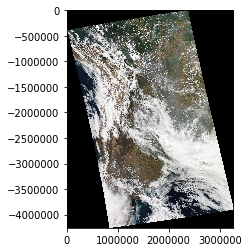

In [0]:
import rasterio as rio
from rasterio.plot import show
with rio.open('AQUA.250M_TrueColor.2019_09_08.17_50_32.tif') as src:
  show(src)

# GDAL reshape Landsat to 15m

In [0]:
!gdal_translate --help

Usage: gdal_translate [--help-general] [--long-usage]
       [-ot {Byte/Int16/UInt16/UInt32/Int32/Float32/Float64/
             CInt16/CInt32/CFloat32/CFloat64}] [-strict]
       [-of format] [-b band] [-mask band] [-expand {gray|rgb|rgba}]
       [-outsize xsize[%]|0 ysize[%]|0] [-tr xres yres]
       [-r {nearest,bilinear,cubic,cubicspline,lanczos,average,mode}]
       [-unscale] [-scale[_bn] [src_min src_max [dst_min dst_max]]]* [-exponent[_bn] exp_val]*
       [-srcwin xoff yoff xsize ysize] [-epo] [-eco]
       [-projwin ulx uly lrx lry] [-projwin_srs srs_def]
       [-a_srs srs_def] [-a_ullr ulx uly lrx lry] [-a_nodata value]
       [-gcp pixel line easting northing [elevation]]*
       [-mo "META-TAG=VALUE"]* [-q] [-sds]
       [-co "NAME=VALUE"]* [-stats] [-norat]
       [-oo NAME=VALUE]*
       src_dataset dst_dataset


In [0]:
!gdal_translate -tr 15 15 LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF landsat_15m.tif

Input file size is 7711, 7821
0...10...20...30...40...50...60...70...80...90...100 - done.


Now we can see the pixel size and quantity again.

In [0]:
!gdalinfo landsat_15m.tif | grep 'Pixel Size'

Pixel Size = (15.000000000000000,-15.000000000000000)


In [0]:
!gdalinfo landsat_15m.tif | grep 'Size is'

Size is 15422, 15642


Note that the amount of pixels in rows and columns has doubled due to a halving of their spatial resolution.

# GDAL reshape Modis to 125m

In [0]:
!gdal_translate -tr 125 125 AQUA.250M_TrueColor.2019_09_08.17_50_32.tif modis_125m.tif

Input file size is 13036, 17039
0...10...20...30...40...50...60...70...80...90...100 - done.


With modis we have the same result.

In [0]:
!gdalinfo modis_125m.tif | grep 'Pixel Size'

Pixel Size = (125.000000000000000,-125.000000000000000)


In [0]:
!gdalinfo modis_125m.tif | grep 'Size is'

Size is 26072, 34078


# Python reshape Landsat to 15m

Now let's do the same procedure but using the Python language.

In [0]:
from osgeo import gdal
gdal.Translate('landsat_15_v2.tif', 'LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF', xRes=15, yRes=15)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f43553fa840> >

# Python reshape MODIS to 125m

In [0]:
from osgeo import gdal
gdal.Translate('modis_125m_v2.tif', 'AQUA.250M_TrueColor.2019_09_08.17_50_32.tif', xRes=125, yRes=125)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f4357136cf0> >

In [0]:
!gdalinfo modis_125m_v2.tif

Driver: GTiff/GeoTIFF
Files: modis_125m_v2.tif
Size is 26072, 34078
Coordinate System is:
PROJCS["ST-WGS84",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Stereographic"],
    PARAMETER["latitude_of_origin",-27.0124626159668],
    PARAMETER["central_meridian",-60.80082321166992],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",1630500],
    PARAMETER["false_northing",-2136000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-125.000000000000000,125.000000000000000)
Pixel Size = (125.000000000000000,-125.000000000000000)
Metadata:
  AREA_OR_POINT=Point
  TIFFTAG_RESOLUTIONUNIT=1 (unitless)
  TIFFTAG_XRESOLUTION=1
  TIFFTAG_YRESOLUTION=1
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinate

# Plot reshaped image

Now we can show the resampled image

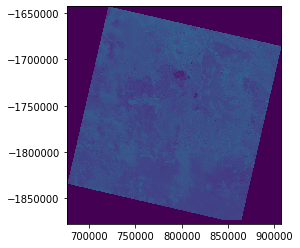

In [0]:
import rasterio as rio
from rasterio.plot import show
with rio.open('landsat_15_v2.tif') as src:
  show(src)

# Same size image operation - Success

With the image loaded in memory, we can perform numerous mathematical operations that give us some information.

Below as an example we will make a sum of matrices.

In [0]:
import rasterio as rio
src = rio.open('LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF')

In [0]:
data1 = src.read(1) # read band 1 

In [0]:
data2 = src.read(1) # read band 1 as another sample of data
data2 = data2 * 3

In [0]:
result = data1 + data2

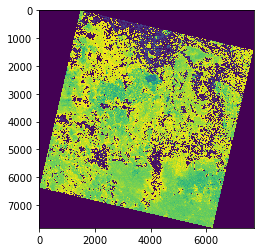

In [0]:
show(result)

# Operation with different size image - Error

Let's test now add the 30m matrix with the 15m matrix

In [0]:
import rasterio as rio
with rio.open('LC08_L1TP_229071_20190908_20190917_01_T1_B5.TIF') as src:
  m30 = src.read(1)

with rio.open('landsat_15m.tif') as src:
  m15 = src.read(1)

In [0]:
result = m30 + m15

ValueError: ignored

This type of operation is no longer possible due to the difference in the number of rows and columns between the two images. As noted above, the number of rows and columns in the 15 meter image is doubled after changing the spatial resolution made with gdal_translate or Python.

# Homework

Download two images with different dates and then calculate the difference in data between the two passages.

# Homework solution

In [7]:
import urllib.request

url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190111_20190111_01_RT/LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF')


url = 'https://landsat-pds.s3.amazonaws.com/c1/L8/229/071/LC08_L1TP_229071_20190212_20190222_01_T1/LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF'
urllib.request.urlretrieve(url, 'LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF')

('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF',
 <http.client.HTTPMessage at 0x7f5dce299dd8>)

In [3]:
!pip install rasterio

     |████████████████████████████████| 18.0MB 240kB/s 


In [0]:
import rasterio as rio
with rio.open('LC08_L1TP_229071_20190111_20190111_01_RT_B5.TIF') as src:
  pre = src.read(1)

with rio.open('LC08_L1TP_229071_20190212_20190222_01_T1_B5.TIF') as src:
  pos = src.read(1)

result_dif = pos - pre